In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


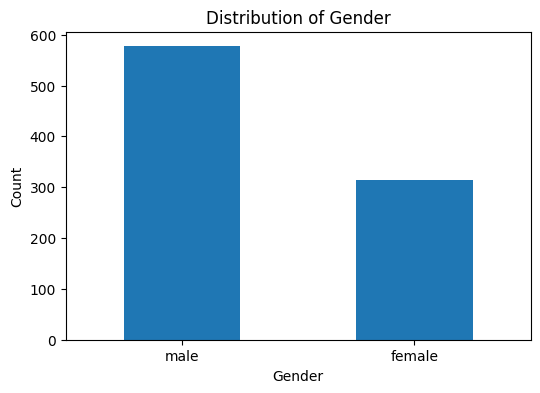

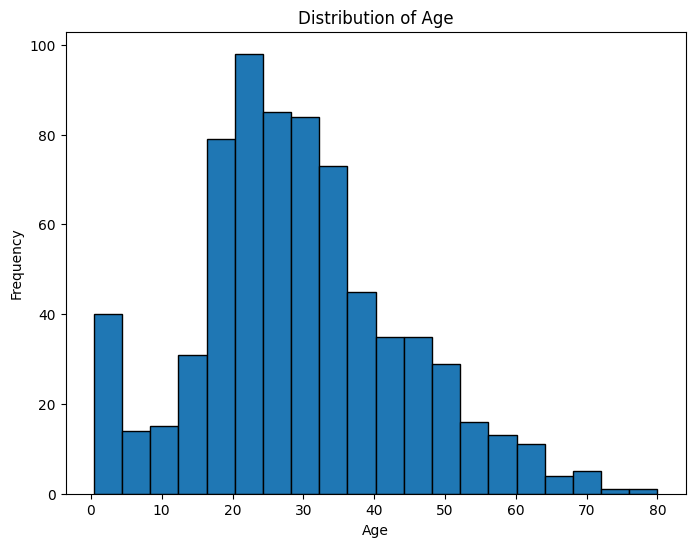

In [ ]:
#task-1
# create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the dataset
df = pd.read_csv(os.path.join(path, 'Titanic-Dataset.csv'))

# --- Example 1: Distribution of a categorical variable (Gender) ---
plt.figure(figsize=(6, 4))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# --- Example 2: Distribution of a continuous variable (Age) ---
# Handle missing values in 'Age' if necessary (e.g., drop them for this visualization)
df_age = df.dropna(subset=['Age'])

plt.figure(figsize=(8, 6))
plt.hist(df_age['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

First 5 rows after cleaning:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        T

/tmp/ipython-input-5-3810848606.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-3810848606.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

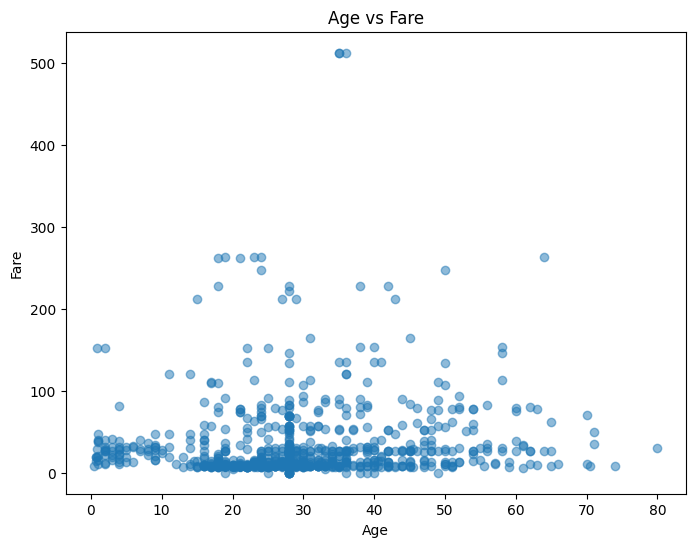

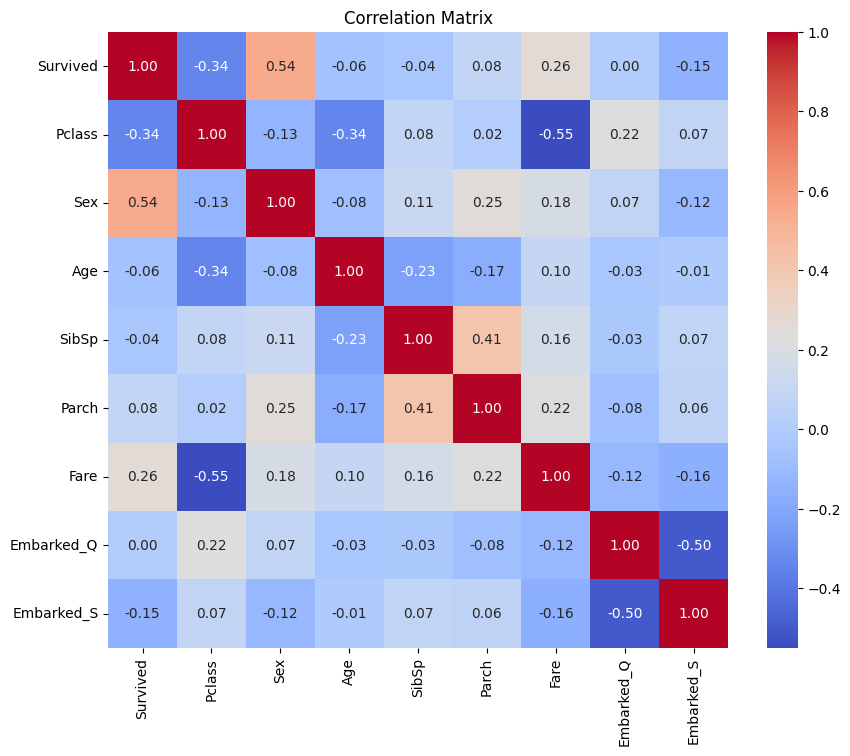

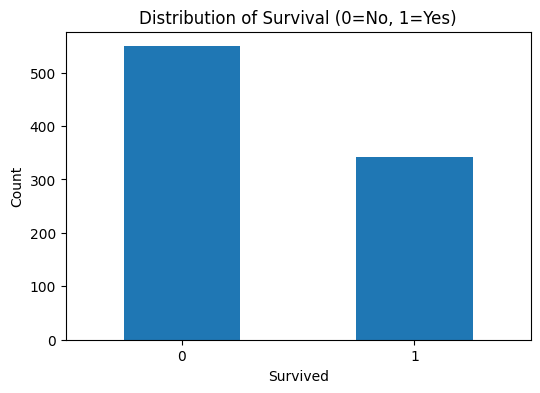

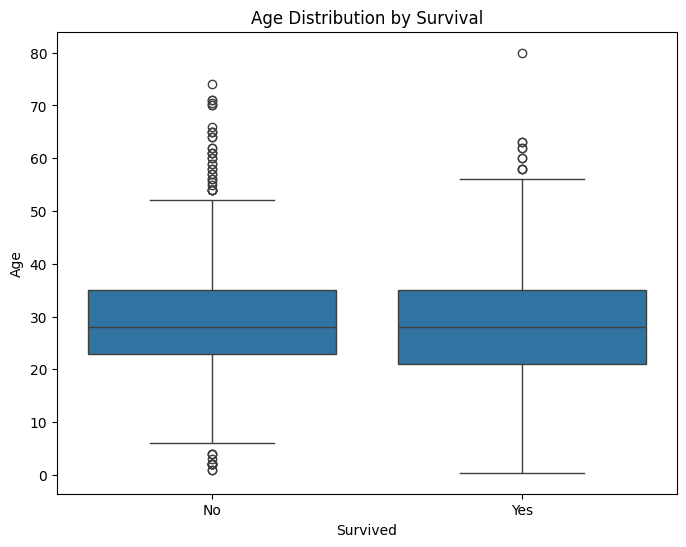

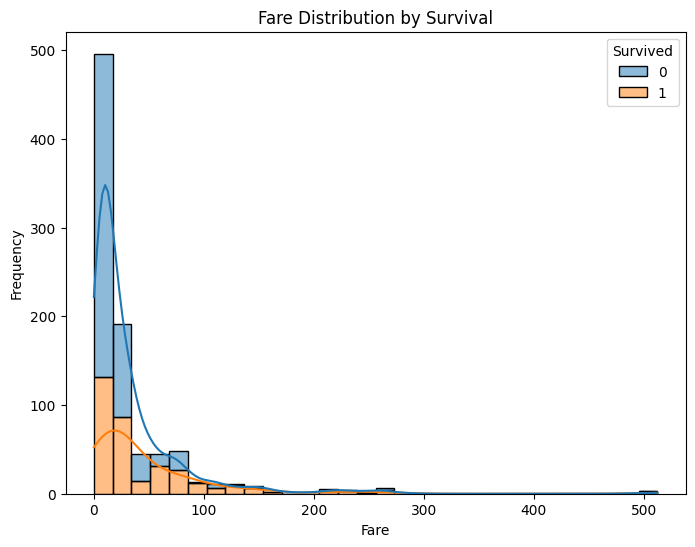

In [ ]:
# task-2
# Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

import pandas as pd
import matplotlib.pyplot as plt
# Perform data cleaning
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Handle missing values in 'Age' - fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Handle missing values in 'Embarked' - fill with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Handle categorical variables - encode 'Sex' and 'Embarked'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns for analysis (e.g., 'PassengerId', 'Name', 'Ticket')
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print("\nFirst 5 rows after cleaning:")
print(df.head())

# Exploratory Data Analysis (EDA)

# --- Explore relationships between variables ---

# Survival rate by Sex
print("\nSurvival rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by Pclass
print("\nSurvival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

# Survival rate by Embarked location
print("\nSurvival rate by Embarked location:")
print(df.groupby(['Embarked_Q', 'Embarked_S'])['Survived'].mean())


# Scatter plot: Age vs Fare
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


# Correlation matrix
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# --- Identify patterns and trends ---

# Distribution of Survival
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Distribution of Survival (0=No, 1=Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Box plot of Age by Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Distribution of Fare by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### **Task-3**

In [ ]:
pip install ucimlrepo


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
 #build a decision tree classifier to predict whether a customer will purchase a product or  service based on their demographic and behavioral data.use a dataset such as the bank marketing dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Handle categorical features in X for the bank marketing dataset
# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nDecision Tree Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
conf_matrix


Decision Tree Classifier Results:
Accuracy: 0.8694

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.92      0.93     11966
         yes       0.45      0.46      0.45      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564


Confusion Matrix:


array([[11057,   909],
       [  862,   736]])

# **Task-4**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/twitter-entity-sentiment-analysis



First 5 rows of the Twitter Entity Sentiment Analysis dataset:
   Tweet_ID     Entity   Sentiment  \
0      3364   Facebook  Irrelevant   
1       352     Amazon     Neutral   
2      8312  Microsoft    Negative   
3      4371      CS-GO    Negative   
4      4433     Google     Neutral   

                                       Tweet_Content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  

Value counts for Sentiment:
Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64


/tmp/ipython-input-6-901743723.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_twitter, x='Sentiment', order=df_twitter['Sentiment'].value_counts().index, palette='viridis')


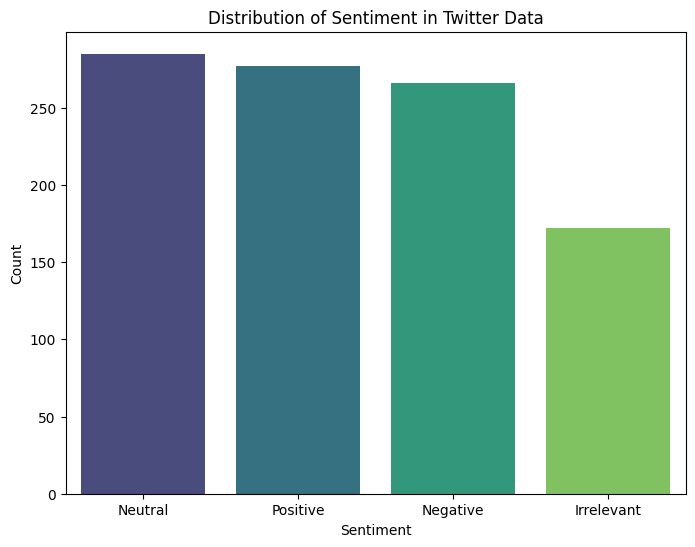

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

df_twitter = pd.read_csv(os.path.join(path, 'twitter_validation.csv'), header=None)
df_twitter.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

print("\nFirst 5 rows of the Twitter Entity Sentiment Analysis dataset:")
print(df_twitter.head())

print("\nValue counts for Sentiment:")
print(df_twitter['Sentiment'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df_twitter, x='Sentiment', order=df_twitter['Sentiment'].value_counts().index, palette='viridis')
plt.title('Distribution of Sentiment in Twitter Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

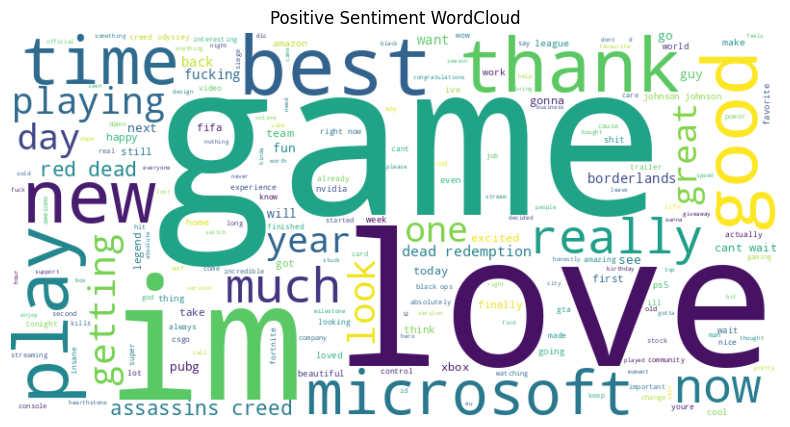

In [ ]:
# 3. WordCloud for Positive Sentiment (using original Sentiment column)
positive_text = ' '.join(df_twitter[df_twitter['Sentiment'] == 'Positive']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment WordCloud')
plt.show()

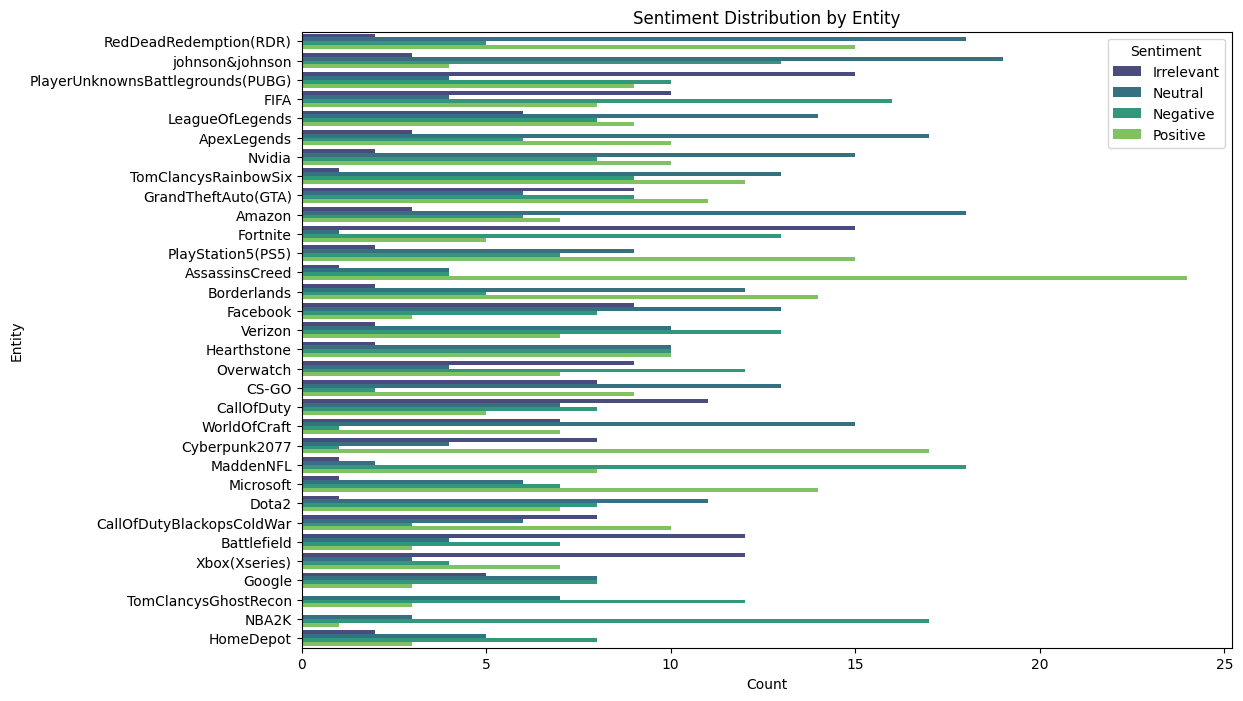

No tweets found for entity: Twitter


/tmp/ipython-input-12-1341312169.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_twitter, x='Sentiment', y='Tweet_Length', palette='viridis', order=df_twitter['Sentiment'].value_counts().index)


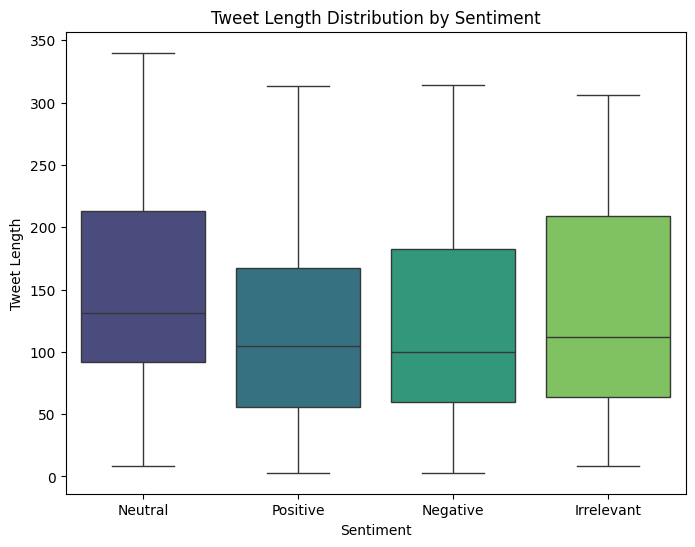

In [ ]:
# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

import matplotlib.pyplot as plt
import seaborn as sns

# Analyze and visualize sentiment patterns

# Explore sentiment distribution by entity
plt.figure(figsize=(12, 8))
sns.countplot(data=df_twitter, y='Entity', hue='Sentiment', palette='viridis', order=df_twitter['Entity'].value_counts().index)
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.show()

# Look at specific entities
specific_entity = 'Twitter' # Example entity
df_specific_entity = df_twitter[df_twitter['Entity'] == specific_entity]

if not df_specific_entity.empty:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_specific_entity, x='Sentiment', order=df_specific_entity['Sentiment'].value_counts().index, palette='viridis')
    plt.title(f'Sentiment Distribution for {specific_entity}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
else:
    print(f"No tweets found for entity: {specific_entity}")

# Analyze the length of tweets by sentiment (simple text analysis)
df_twitter['Tweet_Length'] = df_twitter['Tweet_Content'].str.len()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_twitter, x='Sentiment', y='Tweet_Length', palette='viridis', order=df_twitter['Sentiment'].value_counts().index)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

